From the data analyzed, it appears to show a strong direct correlation between latitude and temperature.  Temperatures in proximity to the equator appeared the highest, with low temperatures appearing in cities furthest from the equator both north and south.  Wind speed also seemed to be lower the closer the city was to the equator. Cloudiness seemed to show a very weak correlation, with the possibility of no real relation or possibly only being driven by the wind factor.

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# URL
weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
#  Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

citys = []
cloud = []
humid = []
lats = []
lngs = []
temp = []
wind = []
countries = []

count = 1

# loop for dataframe columns
for city in cities:
    print(f"Processing {count} || {city}")
    try:
        response = requests.get(weather_url + city.replace(" ","&")).json()
        citys.append(response['name'])
        cloud.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humid.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except Exception:
        print("City not found. Skip me.")
    count += 1
print("End City List")

Processing 1 || puerto ayora
Processing 2 || illoqqortoormiut
City not found. Skip me.
Processing 3 || rolim de moura
City not found. Skip me.
Processing 4 || port alfred
Processing 5 || rikitea
Processing 6 || hobart
Processing 7 || hermanus
Processing 8 || calabozo
Processing 9 || upernavik
Processing 10 || khatanga
Processing 11 || nelson bay
Processing 12 || castro
Processing 13 || taolanaro
City not found. Skip me.
Processing 14 || ushuaia
Processing 15 || naze
Processing 16 || mahebourg
Processing 17 || key west
Processing 18 || carnarvon
Processing 19 || kaitangata
Processing 20 || san patricio
Processing 21 || palana
Processing 22 || lohja
Processing 23 || port lincoln
Processing 24 || merauke
Processing 25 || waddan
Processing 26 || begoro
Processing 27 || georgetown
Processing 28 || dali
Processing 29 || new norfolk
Processing 30 || tondano
Processing 31 || samarai
Processing 32 || akola
Processing 33 || chokurdakh
Processing 34 || jalu
Processing 35 || atuona
Processing 36 |

City not found. Skip me.
Processing 282 || tabiauea
City not found. Skip me.
Processing 283 || hofn
Processing 284 || macamic
Processing 285 || zhigansk
Processing 286 || palm valley
Processing 287 || riyadh
Processing 288 || tsienyane
City not found. Skip me.
Processing 289 || evensk
Processing 290 || chumikan
Processing 291 || haines junction
Processing 292 || hanchuan
Processing 293 || necochea
Processing 294 || rio gallegos
Processing 295 || phun phin
City not found. Skip me.
Processing 296 || chagda
City not found. Skip me.
Processing 297 || lerwick
Processing 298 || moerai
Processing 299 || cidreira
Processing 300 || bocaiuva
Processing 301 || guerrero negro
Processing 302 || yumen
Processing 303 || yefira
City not found. Skip me.
Processing 304 || komsomolskiy
Processing 305 || kibuye
Processing 306 || vostok
Processing 307 || vagur
Processing 308 || katherine
Processing 309 || shenkursk
Processing 310 || fare
Processing 311 || ambilobe
Processing 312 || usinsk
Processing 313 ||

City not found. Skip me.
Processing 556 || boras
Processing 557 || dingle
Processing 558 || chengde
Processing 559 || burgeo
Processing 560 || anadyr
Processing 561 || quatre cocos
City not found. Skip me.
Processing 562 || el alto
City not found. Skip me.
Processing 563 || guatire
Processing 564 || nome
Processing 565 || oriximina
Processing 566 || adrar
Processing 567 || axim
Processing 568 || tilichiki
Processing 569 || cagayan de tawi-tawi
Processing 570 || klyuchi
Processing 571 || scottsbluff
Processing 572 || katastarion
Processing 573 || shakiso
Processing 574 || berdigestyakh
Processing 575 || busayra
Processing 576 || kaa-khem
Processing 577 || saint anthony
City not found. Skip me.
Processing 578 || arandis
Processing 579 || alenquer
Processing 580 || dinguiraye
Processing 581 || kroya
Processing 582 || viedma
Processing 583 || dudinka
Processing 584 || sarangani
Processing 585 || nancha
Processing 586 || chipata
Processing 587 || mayor pablo lagerenza
City not found. Skip m

In [4]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame
weather_dataframe = pd.DataFrame({
    "City": citys,
    "Cloudiness": cloud,
    "Country": countries,
    "Humidity": humid,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temperature": temp,
    "Wind Speeds": wind,
    })

weather_dataframe.to_csv('../WeatherPy/output_file.csv', index=False)

weather_dataframe.count()

City               547
Cloudiness         547
Country            547
Humidity           547
Latitude           547
Longitude          547
Max Temperature    547
Wind Speeds        547
dtype: int64

In [5]:
# Inspect the data and remove the cities where the humidity > 100%.
# Skip this step if there are no cities that have humidity > 100%.

weather_dataframe.loc[weather_dataframe['Humidity']>=100]

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temperature,Wind Speeds
22,Begoro,80,GH,100,6.39,-0.38,70.39,3.49
54,Yellowknife,90,CA,100,62.46,-114.35,21.99,10.29
116,Ponta,39,PT,100,38.73,-28.27,65.44,24.36
138,Jūrmala,90,LV,100,56.97,23.77,44.60,3.36
176,Hambantota,90,LK,100,6.12,81.12,75.20,2.24
192,Noshiro,75,JP,100,40.20,140.02,44.60,2.24
201,Jiancheng,100,CN,100,30.39,104.55,63.00,1.21
234,Nikolskoye,90,RU,100,59.70,30.79,33.01,6.71
263,Hanchuan,20,CN,100,30.65,113.77,60.80,2.24
269,Bocaiúva,90,BR,100,-17.11,-43.81,69.80,3.36


In [6]:
# Get the indices of cities that have humidity over 100%.
upper_outliers = weather_dataframe.loc[weather_dataframe['Humidity']>=100].index
upper_outliers

Int64Index([22, 54, 116, 138, 176, 192, 201, 234, 263, 269, 285, 343], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_dataframe.drop(upper_outliers)
clean_city_data

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temperature,Wind Speeds
0,El Puerto de Santa María,0,ES,93,36.59,-6.23,57.20,3.36
1,Port,94,CD,60,-7.03,29.76,73.56,5.66
2,Rikitea,0,PF,67,-23.12,-134.97,76.08,7.36
3,Hobart,75,AU,67,-42.88,147.33,64.99,8.05
4,Hermanus,0,ZA,80,-34.42,19.23,57.00,5.01
...,...,...,...,...,...,...,...,...
542,Zambezi,13,ZM,65,-13.54,23.10,66.99,2.10
543,Kieta,76,PG,64,-6.22,155.63,86.27,4.50
544,Daru,44,PG,69,-9.08,143.21,84.85,13.31
545,Elliot,100,ZA,94,-31.33,27.85,49.35,3.24


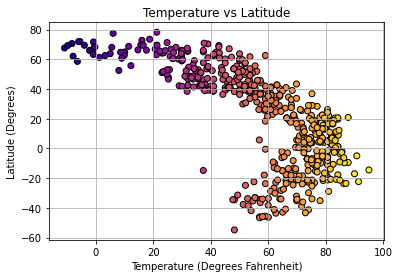

In [8]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

plt.scatter(clean_city_data["Max Temperature"], clean_city_data["Latitude"], c=clean_city_data['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

In [9]:
# Save as a file
plt.savefig('../WeatherPy/Images/TempLat.png')

<Figure size 432x288 with 0 Axes>

In [10]:
# Print your analysis
print("This plot shows temperature vs. latitude.  It clearly shows a relationship between higher temperatures and proximity to the equator.")

This plot shows temperature vs. latitude.  It clearly shows a relationship between higher temperatures and proximity to the equator.


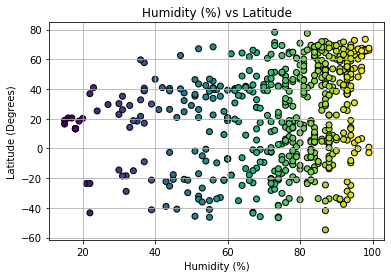

<Figure size 432x288 with 0 Axes>

In [30]:
# Plot your Humidity vs Latitude
plt.scatter(clean_city_data["Humidity"], clean_city_data["Latitude"], c=clean_city_data['Humidity'], edgecolors="black", cmap="viridis")
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save a file
plt.savefig('../WeatherPy/Images/HumidLat.png')

In [12]:
# Type analysis
print("This plot shows humidity vs. latitude for weather in cities based on location.  There appears to be a mirroring effect across the equator for humidity, with similar humidity numbers at inverse latitude coordinates.")

This plot shows humidity vs. latitude for weather in cities based on location.  There appears to be a mirroring effect across the equator for humidity, with similar humidity numbers at inverse latitude coordinates.


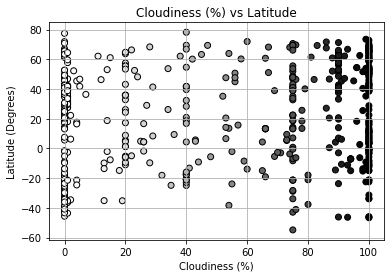

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot Cloudiness vs lat
plt.scatter(clean_city_data["Cloudiness"], clean_city_data["Latitude"], c=clean_city_data['Cloudiness'], edgecolors="black", cmap="Greys")
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/CloudLat.png')

In [14]:
# Analysis
print("The percentage of cloudiness does not seem to be affected by latitude, as shown within this mostly evenly distributed graph.")

The percentage of cloudiness does not seem to be affected by latitude, as shown within this mostly evenly distributed graph.


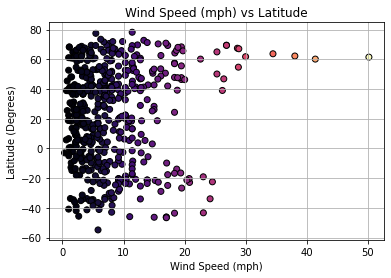

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot Wind Speeds vs Lat
plt.scatter(clean_city_data["Wind Speeds"], clean_city_data["Latitude"], c=clean_city_data['Wind Speeds'], edgecolors="black", cmap="magma")
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/WindLat.png')

In [16]:
# Analysis 
print("Wind speeds seem to not be affected by latitude much, showing an even distribution across the equator, with the exception of a few outliers in the Northern Hemisphere.")

Wind speeds seem to not be affected by latitude much, showing an even distribution across the equator, with the exception of a few outliers in the Northern Hemisphere.


In [17]:
# use .loc for northern and southern hemispheres
northern_hemi = weather_dataframe.loc[weather_dataframe['Latitude']>=0]
southern_hemi = weather_dataframe.loc[weather_dataframe['Latitude']<0]

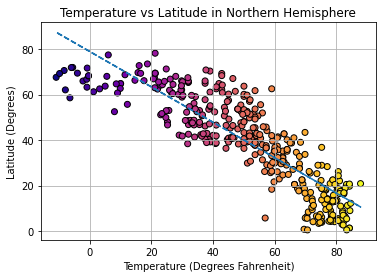

<Figure size 432x288 with 0 Axes>

In [33]:
# Plot Max Temp vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Max Temperature"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Max Temperature"]) + int
plt.plot(northern_hemi["Max Temperature"], fit, "--")

# Create the scatter plot
plt.scatter(northern_hemi["Max Temperature"], northern_hemi["Latitude"], c=northern_hemi['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude in Northern Hemisphere")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/TempLatNorth.png')

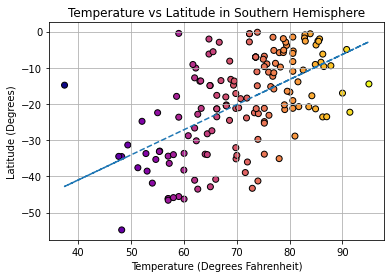

<Figure size 432x288 with 0 Axes>

In [34]:
# Plot Max Temp vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Max Temperature"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Max Temperature"]) + int
plt.plot(southern_hemi["Max Temperature"], fit, "--")

# Plot your scatter plot
plt.scatter(southern_hemi["Max Temperature"], southern_hemi["Latitude"], c=southern_hemi['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude in Southern Hemisphere")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/TempLatSouth.png')

In [20]:
# Analysis 
print("As evidenced by the two plots and their direct line of regression, it appears that the closer to the equator, the higher the temperature can be.  Temperatures seem to drop as distance from the equator increases.")

As evidenced by the two plots and their direct line of regression, it appears that the closer to the equator, the higher the temperature can be.  Temperatures seem to drop as distance from the equator increases.


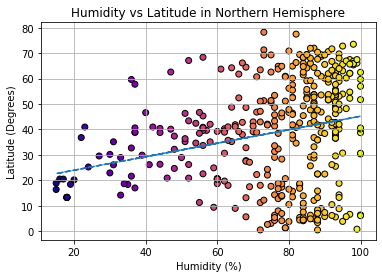

<Figure size 432x288 with 0 Axes>

In [35]:
# Plot Humidity vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Humidity"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Humidity"]) + int
plt.plot(northern_hemi["Humidity"], fit, "--")

# Create your scatter plot
plt.scatter(northern_hemi["Humidity"], northern_hemi["Latitude"], c=northern_hemi['Humidity'], edgecolors="black", cmap="plasma")
plt.title("Humidity vs Latitude in Northern Hemisphere")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/HumidLatNorth.png')

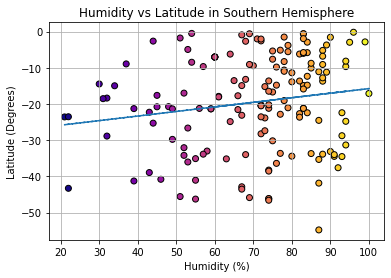

<Figure size 432x288 with 0 Axes>

In [36]:
# Plot Humidity vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Humidity"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Humidity"]) + int
plt.plot(southern_hemi["Humidity"], fit, "--")

# Plot your scatter plot
plt.scatter(southern_hemi["Humidity"], southern_hemi["Latitude"], c=southern_hemi['Humidity'], edgecolors="black", cmap="plasma")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/HumidLatSouth.png')

In [23]:
# Analysis
print("Humidity seems to increase on both plots, showing an interesting aspect of humidity. It appears higher in the southern hemisphere nearest the equator, while the northern hemisphere shows higher amounts of humidity closer to the northern pole.")

Humidity seems to increase on both plots, showing an interesting aspect of humidity. It appears higher in the southern hemisphere nearest the equator, while the northern hemisphere shows higher amounts of humidity closer to the northern pole.


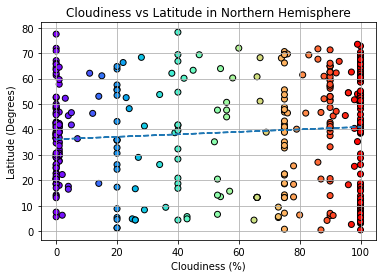

<Figure size 432x288 with 0 Axes>

In [37]:
# Plot Cloudiness vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Cloudiness"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Cloudiness"]) + int
plt.plot(northern_hemi["Cloudiness"], fit, "--")

# Make your scatter plot
plt.scatter(northern_hemi["Cloudiness"], northern_hemi["Latitude"], c=northern_hemi['Cloudiness'], edgecolors="black", cmap="rainbow")
plt.title("Cloudiness vs Latitude in Northern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/CloudLatNorth.png')

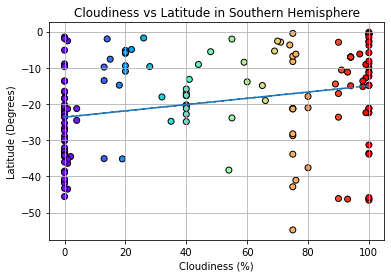

<Figure size 432x288 with 0 Axes>

In [38]:
# Plot Cloudiness vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Cloudiness"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Cloudiness"]) + int
plt.plot(southern_hemi["Cloudiness"], fit, "--")

# Plot the scatter plot!
plt.scatter(southern_hemi["Cloudiness"], southern_hemi["Latitude"], c=southern_hemi['Cloudiness'], edgecolors="black", cmap="rainbow")
plt.title("Cloudiness vs Latitude in Southern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/CloudLatSouth.png')

In [26]:
# Analysis
print("Cloudiness does not seem to be affected by latitude.")

Cloudiness does not seem to be affected by latitude.


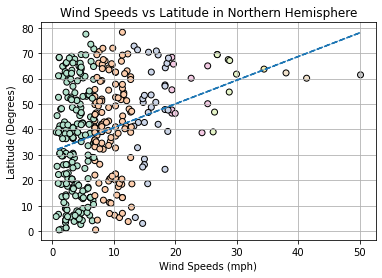

<Figure size 432x288 with 0 Axes>

In [39]:
# Plot Wind Speeds vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Wind Speeds"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Wind Speeds"]) + int
plt.plot(northern_hemi["Wind Speeds"], fit, "--")

# Plot the scatter plot!
plt.scatter(northern_hemi["Wind Speeds"], northern_hemi["Latitude"], c=northern_hemi['Wind Speeds'], edgecolors="black", cmap="Pastel2")
plt.title("Wind Speeds vs Latitude in Northern Hemisphere")
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/WindLatNorth.png')

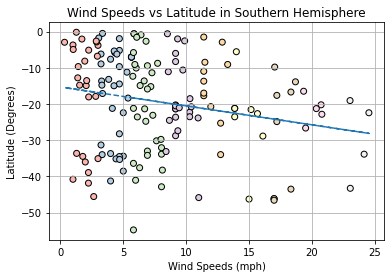

<Figure size 432x288 with 0 Axes>

In [40]:
# Plot Wind Speeds vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Wind Speeds"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Wind Speeds"]) + int
plt.plot(southern_hemi["Wind Speeds"], fit, "--")

# Plot the scatter plot!
plt.scatter(southern_hemi["Wind Speeds"], southern_hemi["Latitude"], c=southern_hemi['Wind Speeds'], edgecolors="black", cmap="Pastel1")
plt.title("Wind Speeds vs Latitude in Southern Hemisphere")
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

# Save
plt.savefig('../WeatherPy/Images/WindLatSouth.png')

In [29]:
# Analysis
print("Wind speed appears to slow a slight increase the further from the equator, and remains relatively denser and slower in the northern hemisphere.")

Wind speed appears to slow a slight increase the further from the equator, and remains relatively denser and slower in the northern hemisphere.
